In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

/tmp/ipykernel_11620/528880001.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
psy = pd.read_csv('Youtube01-Psy.csv', usecols= ['CONTENT', 'CLASS'])
katyperry = pd.read_csv('Youtube02-KatyPerry.csv', usecols= ['CONTENT', 'CLASS'])
lmfao = pd.read_csv('Youtube03-LMFAO.csv', usecols= ['CONTENT', 'CLASS'])
eminem = pd.read_csv('Youtube04-Eminem.csv', usecols= ['CONTENT', 'CLASS'])
shakira = pd.read_csv('Youtube05-Shakira.csv', usecols= ['CONTENT', 'CLASS'])

In [3]:
print(psy.shape)
print(katyperry.shape)
print(lmfao.shape)
print(eminem.shape)
print(shakira.shape)

(350, 2)
(350, 2)
(438, 2)
(448, 2)
(370, 2)


In [4]:
data = pd.concat([psy, katyperry, lmfao, eminem, shakira], ignore_index=True)

In [5]:
data.shape

(1956, 2)

In [6]:
data.sample(13)

,CONTENT,CLASS
1339,Who is still watching in 2015﻿,0
1099,HAHAA THIS DANCE IS TIGHTTTT<br /><br />I know...,1
79,"Hi there~I'm group leader of Angel, a rookie K...",1
1374,RIHANNA - POUR IT UP (VINCENT T. REMIX) RIHANN...,1
1342,▬▬▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬ CHECK OUT MY CHANNEL ▬...,1
1551,Me and my big sister like you﻿,0
1009,Can i get views and subscribers for no reason? 😅﻿,1
971,Check out this video on YouTube:﻿,1
823,"okay, this should cover me for some time... Th...",1
669,I love that you subscribed﻿,1


In [7]:
data['CLASS'] = data['CLASS'].map({
    0 : "Not Spam",
    1 : "Spam"
})

In [8]:
data.sample(5)

,CONTENT,CLASS
130,Can somebody wake me up when we get to 3 billi...,Not Spam
821,this song is fu cking awesom!!!!!!!﻿,Not Spam
270,The little PSY is suffering Brain Tumor and on...,Not Spam
1510,tryna work with some rappers check out the one...,Spam
1063,Hey guys subscribe to my chanel and i will sub...,Spam


In [9]:
X = np.array(data['CONTENT'])
y = np.array(data['CLASS'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
CV = CountVectorizer()
X = CV.fit_transform(X)

In [12]:
X

<1956x4454 sparse matrix of type '<class 'numpy.int64'>'
	with 25765 stored elements in Compressed Sparse Row format>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
X_train.shape, y_train.shape

((1564, 4454), (1564,))

In [15]:
BNB = BernoulliNB()

In [16]:
BNB.fit(X_train, y_train)

BernoulliNB()

In [17]:
y_pred = BNB.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.8852040816326531

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[208,   2],
       [ 43, 139]])

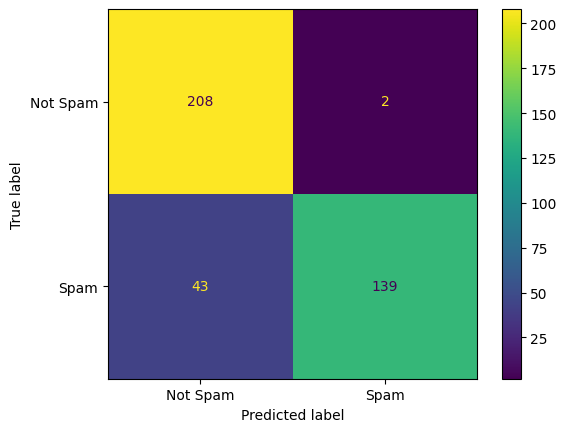

In [20]:
ConfusionMatrixDisplay(cm, display_labels=BNB.classes_).plot()

In [21]:
BNB.score(X_test, y_test)

0.8852040816326531

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Not Spam       0.83      0.99      0.90       210
        Spam       0.99      0.76      0.86       182

    accuracy                           0.89       392
   macro avg       0.91      0.88      0.88       392
weighted avg       0.90      0.89      0.88       392



In [23]:
test = "Aur Bhai Model sahi bna rha hai"
test_data = CV.transform([test]).toarray()
BNB.predict(test_data)[0]

'Not Spam'

In [24]:
test = "Subscribe to my newsletter DAMN DEV"
test_data = CV.transform([test]).toarray()
BNB.predict(test_data)[0]

'Not Spam'

In [25]:
test = "Check this out: https://damndev.substack.com/"
test_data = CV.transform([test]).toarray()
BNB.predict(test_data)[0]

'Spam'